In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# disable future warnings, слишком много при кросс-валидациях
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0


In [3]:
df_train = pd.read_csv('train.csv', encoding='utf8')
print(df_train.shape)
df_train.head()

(24712, 22)


,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [4]:
list(df_train.columns)

['_id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'target']

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [6]:
# null-значения отсутствуют

In [7]:
# посмотрим, какие значения в категориальных признаках

for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print(column)
        print(df_train[column].unique())
        print('\n')

_id
['df7489733b004bbe40d3d37b34f82419' '905a0b9a5456ee962223033473666be3'
 '02d69c07ec6d68e31d641edd45ce61cd' ... '55f91ed39163c14985c2a8ad85b80635'
 '01734878c05d2dded8c726a622fdba9e' '46d0d25dfd1def79632dd437261d0b5c']


job
['technician' 'services' 'blue-collar' 'self-employed' 'admin.'
 'management' 'retired' 'entrepreneur' 'unemployed' 'housemaid' 'student'
 'unknown']


marital
['married' 'single' 'divorced' 'unknown']


education
['professional.course' 'basic.4y' 'basic.9y' 'university.degree'
 'high.school' 'basic.6y' 'unknown' 'illiterate']


default
['unknown' 'no' 'yes']


housing
['no' 'yes' 'unknown']


loan
['no' 'yes' 'unknown']


contact
['cellular' 'telephone']


month
['aug' 'may' 'jun' 'nov' 'oct' 'apr' 'jul' 'mar' 'sep' 'dec']


day_of_week
['tue' 'mon' 'wed' 'fri' 'thu']


poutcome
['nonexistent' 'failure' 'success']




In [8]:
# столбец id нам абсолютно не нужен
#df_train = df_train.drop('_id', axis=1)

In [9]:
# некоторые значения столбца 'education' можно объединить в один, они малозначимы каждый по отдельности

#df_train['education'] = np.where(df_train['education'] == 'basic.4y', 'basic', df_train['education'])
#df_train['education'] = np.where(df_train['education'] == 'basic.6y', 'basic', df_train['education'])
#df_train['education'] = np.where(df_train['education'] == 'basic.9y', 'basic', df_train['education'])
#df_train['education'].unique()

## А теперь небольшое исследование

In [10]:
# посмотрим на общее количество значений целевой функции
df_train['target'].value_counts()

0    21925
1     2787
Name: target, dtype: int64

In [11]:
#from sklearn import preprocessing
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

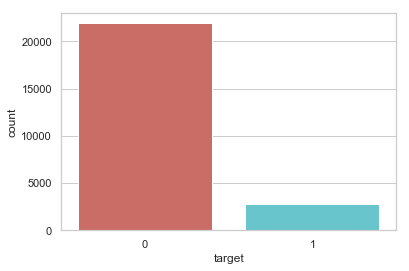

<Figure size 432x288 with 0 Axes>

In [12]:
# отобразим общее количество значений целевой функции на графике

sns.countplot(x='target', data=df_train, palette='hls')
plt.show()
plt.savefig('count_plot')

In [13]:
count_no_sub = len(df_train[df_train['target']==0])
count_sub = len(df_train[df_train['target']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.72207834250567
percentage of subscription 11.277921657494334


In [14]:
# самое значимое из этой таблицы - duration - длительность последнего контакта с клиентом, значительно выше 
# у тех, кто в итоге открыл депозит

df_train.groupby('target').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
target,,,,,,,,,,
0,39.929076,221.030513,2.647662,985.052315,0.131904,0.249688,93.603631,-40.602285,3.809478,5176.165706
1,40.825619,551.896304,2.049157,794.471834,0.486545,-1.230858,93.362048,-39.837890,2.124053,5094.789056


In [15]:
# значительно выше показатель target у студентов и отставных (retired)

#df_train.groupby('job').apply(lambda x: x.sort_values(['target'], ascending=True)).mean()
df_train.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
job,,,,,,,,,,,
admin.,38.198433,257.859770,2.592261,954.390950,0.186920,0.024592,93.534868,-40.188887,3.557676,5164.191589,0.131916
blue-collar,39.603451,265.408290,2.595801,987.695250,0.122398,0.247376,93.655809,-41.434460,3.768257,5175.611777,0.071873
entrepreneur,41.769050,254.012896,2.491208,983.865182,0.127784,0.173154,93.615149,-41.181360,3.809117,5177.129426,0.085580
housemaid,45.493865,246.690184,2.621166,959.398773,0.151840,0.476840,93.698670,-39.786963,4.042655,5181.012117,0.098160
management,42.352105,254.409556,2.515358,962.816268,0.184300,-0.028100,93.517597,-40.433163,3.597356,5166.003072,0.115472
retired,62.199800,270.514486,2.530470,903.752248,0.329670,-0.742957,93.428408,-38.609590,2.706959,5119.562438,0.239760
self-employed,40.061176,265.554118,2.705882,973.291765,0.141176,0.100471,93.566613,-40.582706,3.688554,5171.053647,0.102353
services,37.936428,253.298202,2.630280,979.053116,0.155583,0.163028,93.636135,-41.345671,3.679534,5170.915224,0.079046
student,25.799639,285.160650,2.162455,844.949458,0.537906,-1.423105,93.308888,-39.892780,1.894514,5086.575812,0.301444


In [16]:
# по образованию target выделяется только у illiterate (0.0)
df_train.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
education,,,,,,,,,,,
basic.4y,47.792707,265.908839,2.632184,964.750694,0.147444,0.229806,93.666824,-40.279588,3.762443,5170.614150,0.104637
basic.6y,40.455325,255.880629,2.523231,983.389564,0.132952,0.226733,93.646569,-41.264260,3.759486,5174.790779,0.080057
basic.9y,38.957644,260.996914,2.530715,982.852174,0.134642,0.159607,93.620733,-41.423534,3.696950,5172.784208,0.079102
high.school,37.993028,262.675614,2.587938,964.916333,0.192086,0.020882,93.583756,-40.932665,3.540378,5164.291738,0.105804
illiterate,46.000000,287.285714,1.857143,999.000000,0.142857,-0.385714,93.246429,-40.271429,3.193571,5159.628571,0.000000
professional.course,40.119859,251.705334,2.606041,962.320694,0.153920,0.177153,93.568929,-40.200675,3.713508,5170.595019,0.110219
university.degree,38.785607,254.422903,2.572445,952.102066,0.188672,-0.020701,93.495816,-39.931755,3.533065,5163.064140,0.141880
unknown,43.904717,257.589623,2.637736,944.712264,0.234906,0.057453,93.659073,-39.741509,3.582677,5159.675566,0.133962


In [17]:
df_train.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
marital,,,,,,,,,,,
divorced,44.996007,252.493648,2.661706,968.001089,0.173503,0.163848,93.613442,-40.759891,3.712275,5170.666534,0.105626
married,42.379598,256.559276,2.578979,968.609710,0.152848,0.187735,93.597981,-40.281165,3.748291,5171.937119,0.101338
single,33.111490,263.829144,2.546513,951.348956,0.210623,-0.168314,93.517025,-40.917100,3.313102,5155.168556,0.139611
unknown,42.155556,348.777778,3.244444,932.866667,0.311111,-0.313333,93.458956,-40.473333,3.263000,5155.671111,0.133333


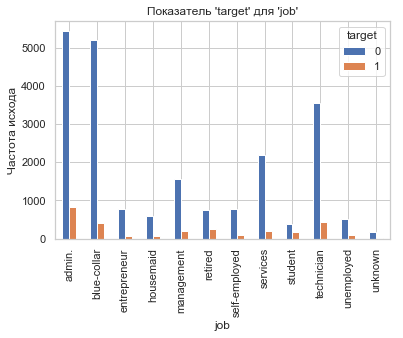

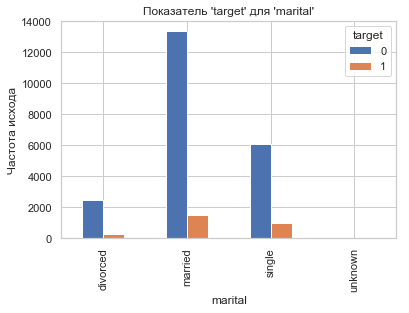

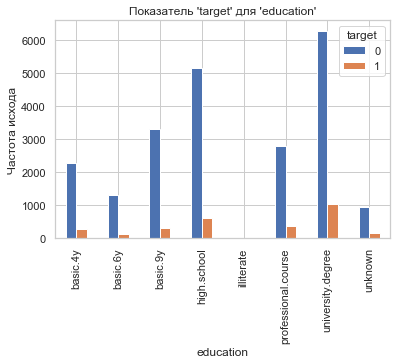

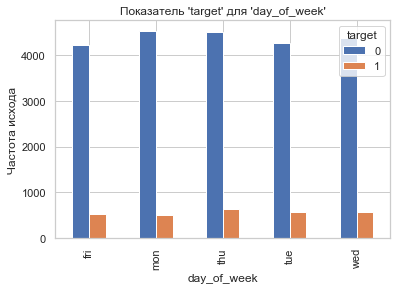

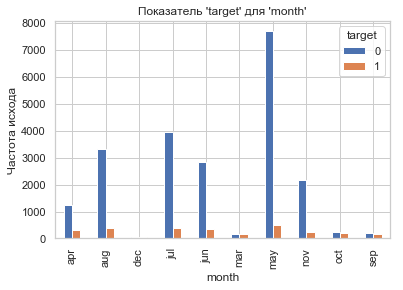

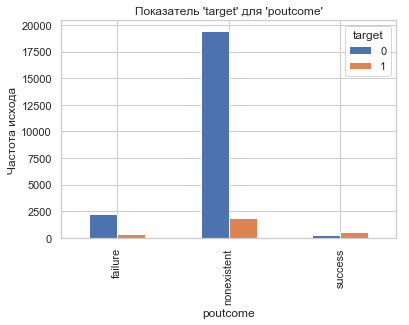

In [18]:
# данные сильно разнятся по показателю 'job'
some_categoricals = ['job', 'marital', 'education', 'day_of_week', 'month', 'poutcome']
age = ['age'] # построить гистограмму

for column in some_categoricals:
    pd.crosstab(df_train[column],df_train['target']).plot(kind='bar')
    plt.title("Показатель 'target' для '{}'".format(column))
    plt.xlabel(column)
    plt.ylabel('Частота исхода')

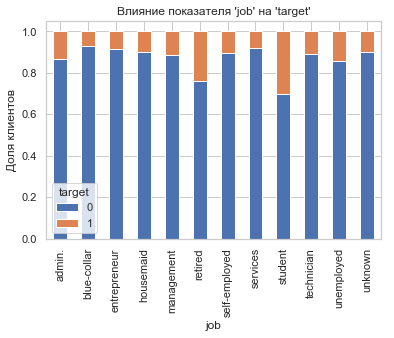

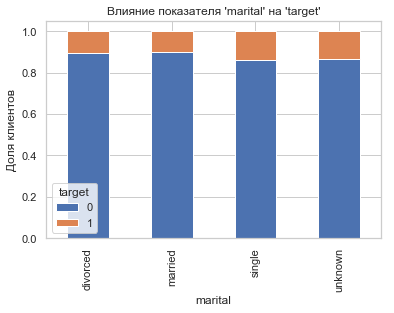

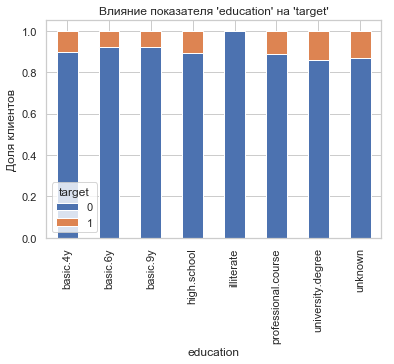

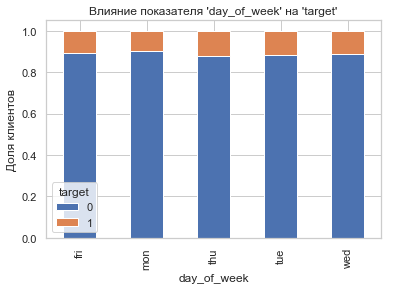

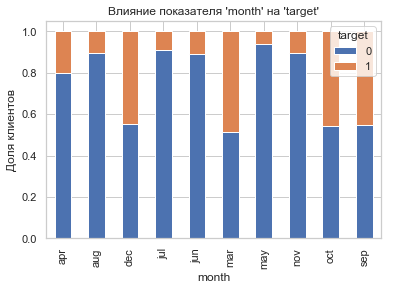

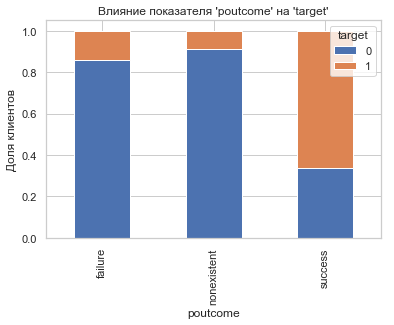

In [19]:
for column in some_categoricals:
    table=pd.crosstab(df_train[column],df_train['target'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title("Влияние показателя '{}' на 'target'".format(column))
    plt.xlabel(column)
    plt.ylabel('Доля клиентов')

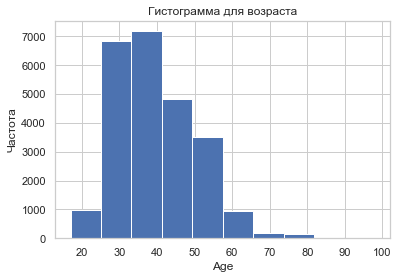

In [20]:
# преобладает возраст 30-40 лет

df_train['age'].hist()
plt.title('Гистограмма для возраста')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.savefig('hist_age')

In [21]:
#df_train['age'].map(lambda x: round(x))

In [22]:
# следующие показатели могут значительно влиять на конечный исход:


In [23]:
i = 0
for column in df_train.columns:
    print('{}: {}'.format(i, column))
    i += 1

0: _id
1: age
2: job
3: marital
4: education
5: default
6: housing
7: loan
8: contact
9: month
10: day_of_week
11: duration
12: campaign
13: pdays
14: previous
15: poutcome
16: emp.var.rate
17: cons.price.idx
18: cons.conf.idx
19: euribor3m
20: nr.employed
21: target


In [24]:
def preproc_data(df_input):
    
    # пусть будет, хотя ранее мы видели, что NaN значений в датафрейме нет
    df_input = df_input.dropna()
    
    # столбец id нам абсолютно не нужен
    df_input = df_input.drop('_id', axis=1)
    
    df_output = pd.get_dummies(df_input, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
                                            'month', 'day_of_week', 'poutcome'])
    return df_output

In [25]:
df_preproc = df_train.pipe(preproc_data)

In [26]:
df_preproc.shape

(24712, 64)

## SMOTE (Synthetic Minority Over-sampling Technique)

## RFE - Recursive Feature Elimination

## Начнём обучение

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [28]:
X = df_preproc.drop('target', axis = 1)
y = df_preproc['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
#lr = LogisticRegression()

lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score#, precision_recall_curve

In [33]:
accuracy_lr = accuracy_score(y_test, predict_lr)
precision_lr = precision_score(y_test, predict_lr)
recall_lr = recall_score(y_test, predict_lr)

In [34]:
print('Accuracy of Logistic Regression is: {:.5f}'.format(accuracy_lr))
print('Precision of Logistic Regression is: {:.5f}'.format(precision_lr))
print('Recall of Logistic Regression is: {:.5f}'.format(recall_lr))

Accuracy of Logistic Regression is: 0.90963
Precision of Logistic Regression is: 0.65422
Recall of Logistic Regression is: 0.40266


Logistic Regression ROC-AUC = 0.9310363438005569


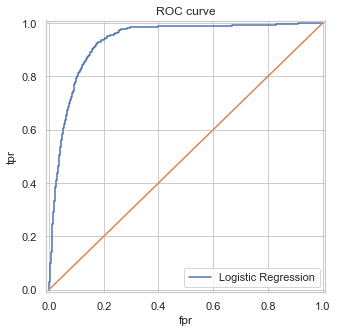

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_proba_lr[:, 1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

print('Logistic Regression ROC-AUC = {}'.format(roc_auc_score(y_test, predict_proba_lr[:,1])))

In [36]:
from sklearn.model_selection import cross_val_score
lr_cross = LogisticRegression()

cross_val_score = cross_val_score(
    lr_cross,
    X_train,
    y_train,
    scoring = 'roc_auc',
    cv = 10
)

print('ROC-AUC after Cross Validation is: {}'.format(cross_val_score.mean()))

ROC-AUC after Cross Validation is: 0.9302123880141157


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_lr)

array([[6411,  176],
       [ 494,  333]], dtype=int64)

In [38]:
pred = pd.Series(predict_lr)
pred.value_counts()

0    6905
1     509
dtype: int64

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6587
           1       0.65      0.40      0.50       827

   micro avg       0.91      0.91      0.91      7414
   macro avg       0.79      0.69      0.72      7414
weighted avg       0.90      0.91      0.90      7414



In [40]:
y_train.value_counts()

0    15338
1     1960
Name: target, dtype: int64

### kNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])

knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
predict_proba_knn = knn.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [43]:
accuracy_knn = accuracy_score(y_test, predict_knn)
precision_knn = precision_score(y_test, predict_knn)
recall_knn = recall_score(y_test, predict_knn)

In [44]:
print('Accuracy of Decision Tree Classifier is: {:.5f}'.format(accuracy_knn))
print('Precision of Decision Tree Classifier is: {:.5f}'.format(precision_knn))
print('Recall of Decision Tree Classifier is: {:.5f}'.format(recall_knn))

Accuracy of Decision Tree Classifier is: 0.89790
Precision of Decision Tree Classifier is: 0.59459
Recall of Decision Tree Classifier is: 0.26602


kNN ROC-AUC = 0.8034758104206208


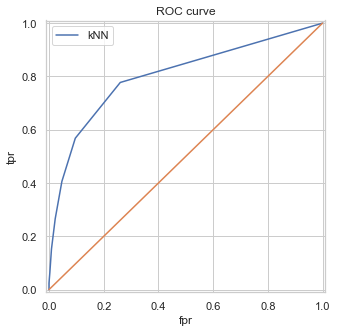

In [45]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, predict_proba_knn[:, 1])
plt.figure(figsize = (5, 5))
plt.plot(fpr_knn, tpr_knn, label = 'kNN')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

print('kNN ROC-AUC = {}'.format(roc_auc_score(y_test, predict_proba_knn[:,1])))

In [46]:
from sklearn.model_selection import cross_val_score
knn_cross = KNeighborsClassifier()

cross_val_score = cross_val_score(
    knn_cross,
    X_train,
    y_train,
    scoring = 'roc_auc',
    cv = 10
)

print('kNN ROC-AUC after Cross Validation is: {}'.format(cross_val_score.mean()))

kNN ROC-AUC after Cross Validation is: 0.8673398306768343


### Decision Tree Regression

In [47]:
from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(max_depth=12)

dtc = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(max_depth=12))
])

dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [48]:
accuracy_dtc = accuracy_score(y_test, predict_dtc)
precision_dtc = precision_score(y_test, predict_dtc)
recall_dtc = recall_score(y_test, predict_dtc)

In [49]:
print('Accuracy of Decision Tree Classifier is: {:.5f}'.format(accuracy_dtc))
print('Precision of Decision Tree Classifier is: {:.5f}'.format(precision_dtc))
print('Recall of Decision Tree Classifier is: {:.5f}'.format(recall_dtc))

Accuracy of Decision Tree Classifier is: 0.90504
Precision of Decision Tree Classifier is: 0.57401
Recall of Decision Tree Classifier is: 0.57678


Decision Tree Classifier ROC-AUC = 0.8020947052464373


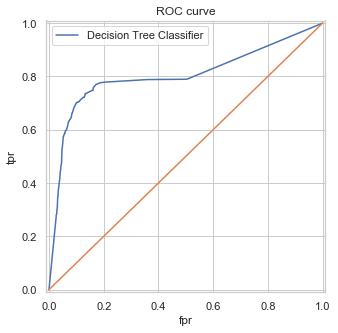

In [50]:
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_proba_dtc[:, 1])
plt.figure(figsize = (5, 5))
plt.plot(fpr_dtc, tpr_dtc, label = 'Decision Tree Classifier')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

print('Decision Tree Classifier ROC-AUC = {}'.format(roc_auc_score(y_test, predict_proba_dtc[:,1])))

In [51]:
from sklearn.model_selection import cross_val_score
dtc_cross = DecisionTreeClassifier()

cross_val_score = cross_val_score(
    dtc_cross,
    X_train,
    y_train,
    scoring = 'roc_auc',
    cv = 10
)

print('DTC ROC-AUC after Cross Validation is: {}'.format(cross_val_score.mean()))

DTC ROC-AUC after Cross Validation is: 0.7342331241403348


In [52]:
# Итак, лучше всех себя показала Логистическая Регрессия

## Обучим модель

In [53]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)
print(df_test.info())

(16476, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11

In [54]:
df_test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [55]:
df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['target'] = 0
df = df_test.append(df_train, sort=False).reset_index(drop=True)

df_preproc = preproc_data(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc['target']
X = df_train_preproc.drop(['target'], axis=1)

X_test_submission = df_test_preproc.drop(['target'], axis=1)

X_test_submission.shape, X.shape, y.shape

((16476, 63), (24712, 63), (24712,))

In [56]:
from sklearn.model_selection import cross_val_score
#lr_cross = LogisticRegression()

lr_cross = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg_cross', LogisticRegression())
])

cross_val_score = cross_val_score(
    lr_cross,
    X,
    y,
    scoring = 'roc_auc',
    cv = 10
)

print('ROC-AUC after Cross Validation is: {}'.format(cross_val_score.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input

ROC-AUC after Cross Validation is: 0.9329411017913808


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [57]:
lr.fit(X, y)
predict_lr_test = lr.predict(X_test_submission)
predict_proba_lr_test = lr.predict_proba(X_test_submission)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [58]:
submission = pd.DataFrame(columns=['_id', 'predicted'],)
submission['_id'], submission['predicted'] = df_test._id.values, predict_proba_lr_test[:,1]

In [59]:
submission.head()

,_id,predicted
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.056094
1,ccac3879652b08cb8b44c1920fd93afa,0.008034
2,fcccab4d7a76f70647f015f2c84c2af8,0.014727
3,ed8399278c30678dab739045fa12b440,0.039927
4,1d4d62ac5cabcb48bac7112813f290cb,0.020538


In [60]:
submission.to_csv('submission.csv', index=False)